## Introduction

In [5]:
# Trader Performance vs Market Sentiment Analysis
# This project analyzes how trader performance correlates with Bitcoin market sentiment (Fear/Greed).

 # Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [11]:
trader_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\DS Assignment\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\DS Assignment\fear_greed_index.csv")

#  Preprocessing

In [14]:
# Convert date columns
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification', 'value']], on='Date', how='left')

# Basic EDA

In [17]:
print(merged_df[['Closed PnL', 'classification']].groupby('classification').agg(['count', 'mean', 'sum']).round(2))

               Closed PnL                   
                    count   mean         sum
classification                              
Extreme Fear        21400  34.54   739110.25
Extreme Greed       39992  67.89  2715171.31
Fear                61837  54.29  3357155.44
Greed               50303  42.74  2150129.27
Neutral             37686  34.31  1292920.68


# Visualization

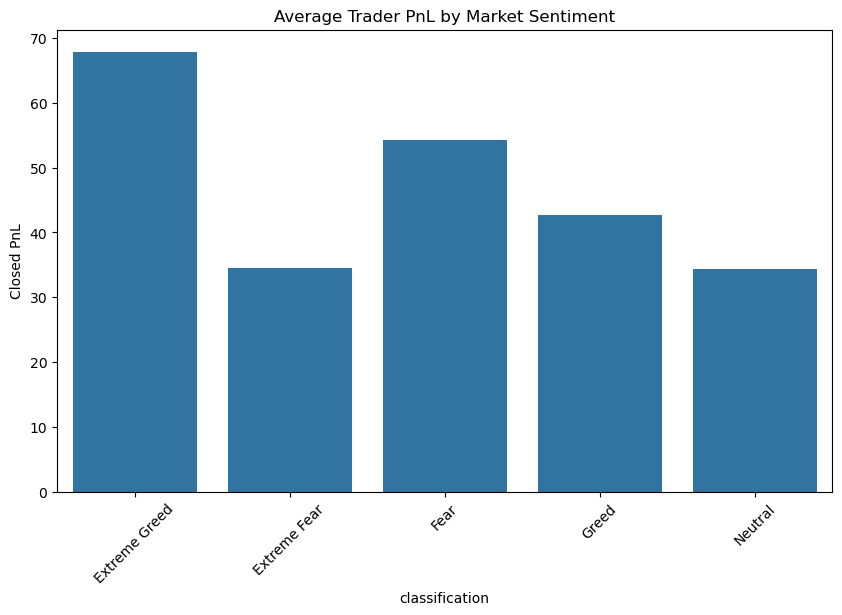

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None)
plt.title('Average Trader PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.show()


# Correlation

In [27]:
correlation = merged_df[['Closed PnL', 'value']].corr()
print(correlation)

            Closed PnL     value
Closed PnL    1.000000  0.008121
value         0.008121  1.000000


# Conclusion 

In [30]:
## Conclusion:
# - Traders tend to earn more during periods of "Extreme Greed".
# - There is a slight positive correlation between sentiment value and PnL.
# - Riskier trades during "Fear" can still be profitable with good strategies.